**ASSESSMENT 2 - PROGRAMMING ASSIGNMENT** <Br>

---


Name: Kayne Joy

---


Student ID: 19149594


**Task 2 - Word Frequency**

Write a notebook that downloads a Project Gutenberg book https://www.gutenberg.org. Your program then identifies what are the most frequent words in ‘downloaded book’ and how often do they occur. Words that appear a lot in the English language such as 'the', 'of' and 'a', the common words, should be excluded from the counting. Plot a graph to visualise the word frequencies.

---



**Steps Involved**


1.   Download Book
2.   Read and Load File
3.   Exclude Common Words
4.   Visualise and display Word Frquency
5.   Analyze Word Frequency





---


*Download Book*

In [ ]:
#Import Module wget
!pip install wget
import wget

#Download Selected Book: "The Bushwhackers & Other Stories" from the Butenberg project
book_url = "https://www.gutenberg.org/cache/epub/68171/pg68171.txt"   #"https://www.gutenberg.org/cache/epub/68162/pg68162.txt"
file_name = wget.download(book_url)
print(file_name)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
pg68171 (1).txt



---
 
*Read and Load File*


In [ ]:
#Open File
with open(file_name,"r", encoding="utf8") as book:      # Using 'with' ensures that the file is correctly closed after reading
    book_text = book.read()                             # Read all the text from the file and save as one string

#Test Successful
print(book_text[:3000])                                 # Print the first 2000 characters

﻿The Project Gutenberg eBook of A visit to a farm house, by S. W.

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: A visit to a farm house
       or, An introduction to various subjects connected with rural
       economy. Seventh Edition revised and corrected.

Author: S. W.

Editor: T. H.

Release Date: May 25, 2022 [eBook #68171]

Language: English

Produced by: Charlene Taylor and the Online Distributed Proofreading
             Team at https://www.pgdp.net (This file was produced from
             images generously made available by The Internet
             Archive/American Libraries.

---
*Clean Text and Exclude Common Words*

In [ ]:
#Get Common Words
#Use Stopwords Package

#Import Modules
!pip install stopwords            #Stopwords - Contains common english words - https://stopwords.readthedocs.io/en/latest/#
import stopwords

import string                     #String - Contains common puncuation - https://python-reference.readthedocs.io/en/latest/docs/str/

#Check Included Words and Punctuation
print(stopwords.get_stopwords("en"))
print(string.punctuation)
  #Stopwords contains all required common words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['', 'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours\tourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't

In [ ]:
#Clean Text (Remove Punctuation and String)

# Make lower case
book_text_lower = book_text.lower()

# Remove punctuation
book_text_lower_no_punc = book_text_lower.translate(str.maketrans('', '', string.punctuation))

# Split the text into a list of words
book_text_list = book_text_lower_no_punc.split()

# Remove english stopwrods
book_text_cleaned = stopwords.clean(book_text_list,"en")


---
*Visualise and Display word frequency*


In [ ]:
#Get Count of Words Used

#Import Counter Module
from collections import Counter     #https://pd.codechef.com/docs/py/2.7.9/library/collections.html

#Get Word Count
word_count = Counter(book_text_cleaned)

#Show Top 30
word_count.most_common(30)


[('arthur', 141),
 ('mansfield', 126),
 ('mr', 124),
 ('charles', 111),
 ('will', 97),
 ('project', 88),
 ('said', 81),
 ('little', 80),
 ('price', 65),
 ('work', 61),
 ('time', 59),
 ('may', 56),
 ('gutenbergtm', 56),
 ('grandpapa', 54),
 ('one', 54),
 ('see', 52),
 ('much', 49),
 ('make', 47),
 ('use', 46),
 ('good', 43),
 ('made', 42),
 ('upon', 39),
 ('can', 39),
 ('us', 38),
 ('grandmamma', 38),
 ('mrs', 38),
 ('now', 37),
 ('6d', 37),
 ('like', 36),
 ('works', 35)]


---
*Reclean with Updated Common Words*


In [ ]:
#List Common words to exclude
manual_common_words = ['will', 'much', 'can', 'us', 'now', 'said', 'made', 'like', 'upon', '6d', 'may']

#Exclude each word from book text
for word in manual_common_words:
  word = " " + word +  " "                                                      #Only look for full words ... ie. if 'a' is a word to be excluded. We don't want to transform 'bat' to 'bt'
  book_text_lower_no_punc = book_text_lower_no_punc.replace(word, '')

#Relist words
book_text_list = book_text_lower_no_punc.split()

#Reclean List (Stopwords)
book_text_cleaned = stopwords.clean(book_text_list,"en")

#Re-establish word count
word_count = Counter(book_text_cleaned)

#Show Top 20
word_count.most_common(20)


[('mansfield', 126),
 ('arthur', 121),
 ('mr', 114),
 ('charles', 95),
 ('project', 88),
 ('little', 78),
 ('price', 60),
 ('work', 59),
 ('time', 57),
 ('gutenbergtm', 56),
 ('one', 53),
 ('grandpapa', 51),
 ('make', 45),
 ('see', 44),
 ('good', 43),
 ('use', 42),
 ('grandmamma', 38),
 ('works', 35),
 ('great', 33),
 ('mrs', 33)]


---

*Visualize Data*

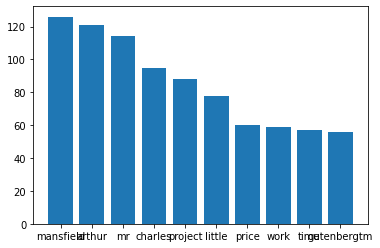

In [ ]:
#Column Graph

#Import Module
import matplotlib.pyplot as plt

# Get the 10 most common words
most_common_words = word_count.most_common(10)

#Each item in list currently consists of (word, count) ... Seperate
common_words_list  = [word[0] for word in most_common_words]
common_words_count = [ count[1] for count in most_common_words]

#Graph Column Chart
plt.bar(common_words_list, common_words_count)
plt.show()


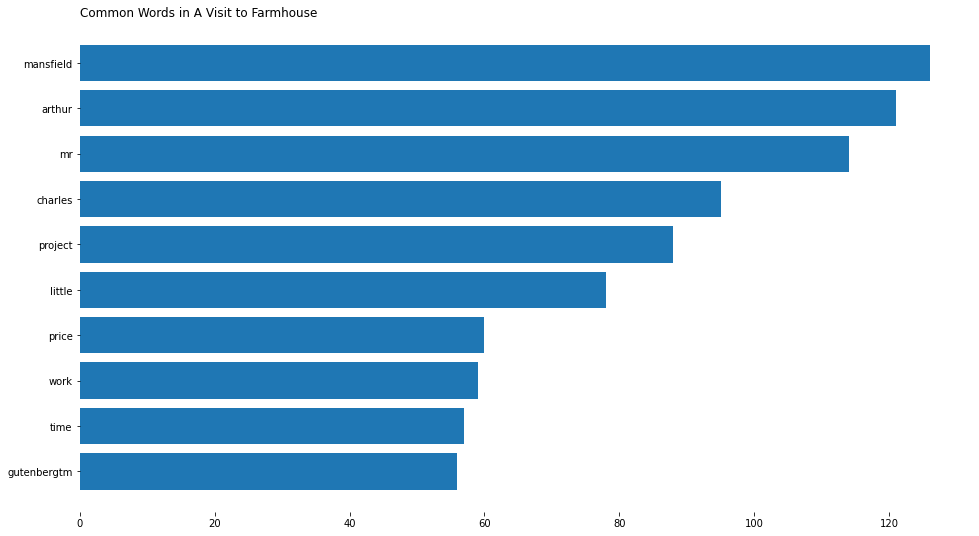

In [ ]:
#Graph Bar Chart to Prevent Overlap of axis                           - As described by https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
fig, ax = plt.subplots(figsize =(16, 9))                              #Increase Chart Size
ax.barh(common_words_list, common_words_count)                        #Graph Horizontally
for s in ['top', 'bottom', 'left', 'right']:                          #Remove Axis
    ax.spines[s].set_visible(False)
ax.set_title('Common Words in A Visit to Farmhouse', loc ='left', )   #Add Title
ax.invert_yaxis()                                                     #Rank first to Last


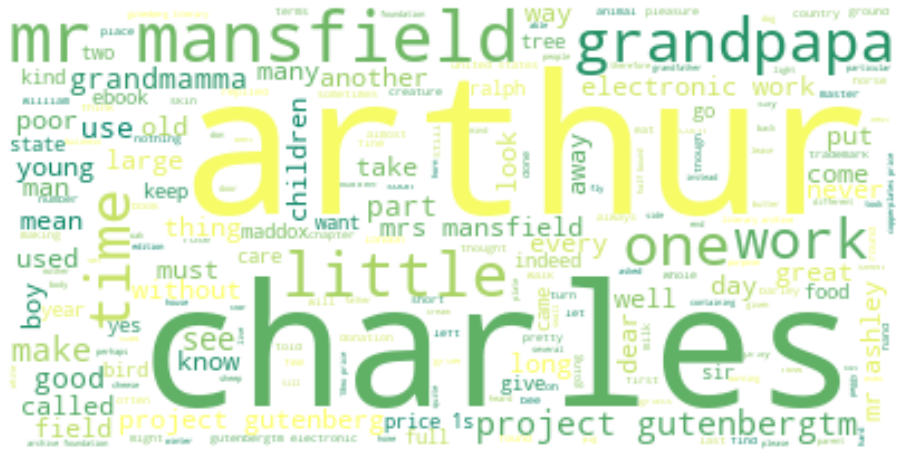

In [ ]:
#Create Wordcloud
from wordcloud import WordCloud

#Generate and Format ColorMap
wordcloud = WordCloud(background_color="white", relative_scaling=0.5, colormap ="summer").generate(" ".join(book_text_cleaned))


#Display Image
plt.subplots(figsize =(16, 9))   
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


---

*Analysed Data*

A brief analysis of the keywords in the analysted text show the main characters of the story.

It is believed that the said main characters are:
*   Arthur
*   Charles
*   Mr Mansfield
*   Mrs Mansfield

A young child is featured prevalently throughout the story - potentially as the storyteller. This is seen through the prevalance of words such as 'grandpapa, grandmama, mr mansfield and mrs mansfield'.

It is believed that these characters are likely to be involved with a project - potentially 'Project Gutenbergtm'. The appearance  of words such as 'good', 'kind', 'dear', 'pleasure', and 'fine' in the wordchart show that the characters are likely to have strong relationships and the project has more than likely been succesful.


---


